# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


***Описание данных***  

* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита  

***Инструкция по выполнению***

1. В двух столбцах есть пропущенные значения. Один из них — days_employed. Пропуски в этом столбце вы обработаете на следующем этапе. Найдите другой столбец и заполните пропущенные значения в нём медианным значением:
* опишите, какие пропущенные значения вы обнаружили;
* проверьте, какую долю составляют пропущенные значения в каждом из столбцов с пропусками;
* приведите возможные причины появления пропусков в данных;
* объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.  

2. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Например, отрицательное количество дней трудового стажа в столбце days_employed. Для реальных данных это нормально. Обработайте значения в столбцах с аномалиями и опишите возможные причины появления таких данных. После обработки аномалий заполните пропуски в days_employed медианными значениями по этому столбцу.  

3. Замените вещественный тип данных в столбце total_income на целочисленный, например, с помощью метода astype().  

4. Если в данных присутствуют строки-дубликаты, удалите их. Также обработайте неявные дубликаты. Например, в столбце education есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к одному регистру. Проверьте остальные столбцы. После удаления дубликатов сделайте следующее:
поясните, как выбирали метод для поиска и удаления дубликатов в данных;
приведите возможные причины появления дубликатов.  

5. Создайте два новых датафрейма, в которых:
* каждому уникальному значению из education соответствует уникальное значение education_id — в первом;
* каждому уникальному значению из family_status соответствует уникальное значение family_status_id — во втором.  
Удалите из исходного датафрейма столбцы education и family_status, оставив только их идентификаторы: education_id и family_status_id. Новые датафреймы — это те самые «словари» (не путайте с одноимённой структурой данных в Python), к которым вы сможете обращаться по идентификатору.
6. На основании диапазонов, указанных ниже, создайте столбец total_income_category с категориями:  
 * 0–30000 — 'E';  
 * 30001–50000 — 'D';  
 * 50001–200000 — 'C';  
 * 200001–1000000 — 'B';  
 * 1000001 и выше — 'A'.  
 
Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.   

7. Создайте функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:  
 * 'операции с автомобилем',  
 * 'операции с недвижимостью',  
 * 'проведение свадьбы',  
 * 'получение образования'.  
 
Например, если в столбце purpose находится подстрока 'на покупку автомобиля', то в столбце purpose_category должна появиться строка 'операции с автомобилем'.
Вы можете использовать собственную функцию и метод apply(). Изучите данные в столбце purpose и определите, какие подстроки помогут вам правильно определить категорию.   

***Ответьте на вопросы***
1. Ответы на вопросы можно разместить в ячейках тетрадок Jupyter Notebook **с типом markdown.
2. Есть ли зависимость между количеством детей и возвратом кредита в срок?
3. Есть ли зависимость между семейным положением и возвратом кредита в срок?
4. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
5. Как разные цели кредита влияют на его возврат в срок?   

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')
df.head(15)#получение первых 15 строк датафрейма

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [2]:
df.info() #получение информации 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

По датафрейму и информации о нём видно, что данные трудового стажа указаны некорректно, имеются пропущенные значения о трудовом стаже и доходе, в строках используется верхний и нижний регистр, в некоторых столбцах содержатся данные вещественного типа, одинаковые цели получения кредита написаны в разной форме.

## Шаг 2. Предобработка данных

### Обработка пропусков и некорректных значений

In [3]:
df.isna().sum() #подсчёт пропусков в столбцах

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Для получения кредита и нашего проекта трудовой стаж не столь важен, но, чтобы заполнить пропуски средним значением, нужно избавиться от отрицательного и тысячелетнего стажа. Допустим, что в некоторых строках данные указаны в часах и людям со стажем от 60 лет не так часто предлагают и одобряют кредиты. Стаж 39 лет при возрасте 53 года тоже маловероятен, но более реалистичен.

In [4]:
df['days_employed'] = df['days_employed'].abs()#избавились от отрицательного стажа
df.loc[df['days_employed'] > 22000, 'days_employed'] = df.loc[df['days_employed'] > 22000, 'days_employed'] / 24 #перевели часы в дни (по крайней мере какую-то часть)
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].mean()) #заполнили пропуски средним значением

Пропуски в столбце о доходе мы заполним средним значением по котегориям: пол, образование, тип дохода.

In [5]:
df['total_income'] = df['total_income'].fillna(df.groupby(['income_type', 'education', 'gender'])['total_income'].transform('mean'))

Проверим количество пропусков в столбце доходов.

In [6]:
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,4641.641176,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости


In [7]:
df[df['income_type'] == 'предприниматель']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,4641.641176,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости
18697,0,520.848083,27,высшее,0,гражданский брак,1,F,предприниматель,0,499163.144947,на проведение свадьбы


Предпринимателей всего двое, поэтому средний доход для одного из них возьмём из данных по категориям: пол, возраст, образование.

In [8]:
df['total_income'] = df['total_income'].fillna(df.groupby(['dob_years', 'education', 'gender'])['total_income'].transform('mean'))

In [9]:
display(df[df['income_type'] == 'предприниматель']) #проверили заполнение пропуска

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
5936,0,4641.641176,58,высшее,0,женат / замужем,0,M,предприниматель,0,202355.910578,покупка жилой недвижимости
18697,0,520.848083,27,высшее,0,гражданский брак,1,F,предприниматель,0,499163.144947,на проведение свадьбы


In [10]:
df.isna().sum() #подводя итоги по пропущенным значениям

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Пропущенных значений не осталось. Далее выведем списки уникальных значений по столбцам для проверки корректности данных.

In [11]:
df['children'].unique() #список значений количества детей в семье

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Допустим, что -1 ребенка быть не может.

In [12]:
df['children'] = df['children'].abs() #вернули семье ребёнка

Как и 20. Хотя...

In [13]:
display(df[df['children'] == 20]['dob_years']) #выяснили, сколько людей сильно старались побить рекорд и сколько им лет

606      21
720      44
1074     56
2510     59
2941      0
         ..
21008    40
21325    37
21390    53
21404    52
21491    27
Name: dob_years, Length: 76, dtype: int64

А теперь представим, что это ошибка операциониста, вносившего неверные данные 76 раз, либо чья-то шутка, и исправим.

In [14]:
df.loc[df['children'] == 20, 'children'] = df.loc[df['children'] == 20, 'children'] / 10
df['children'].sort_values().unique() #отсортируем и перепроверим

array([0., 1., 2., 3., 4., 5.])

In [15]:
df['children'].value_counts(normalize=True)

0.0    0.657329
1.0    0.226016
2.0    0.099001
3.0    0.015331
4.0    0.001905
5.0    0.000418
Name: children, dtype: float64

In [16]:
df['dob_years'].sort_values().unique() #список уникальных значений возраста

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

Вместо "0" подставим среднее значение возраста.

In [17]:
df.loc[df['dob_years'] == 0, 'dob_years'] = df['dob_years'].mean()
df['dob_years'].sort_values().unique()

array([19.        , 20.        , 21.        , 22.        , 23.        ,
       24.        , 25.        , 26.        , 27.        , 28.        ,
       29.        , 30.        , 31.        , 32.        , 33.        ,
       34.        , 35.        , 36.        , 37.        , 38.        ,
       39.        , 40.        , 41.        , 42.        , 43.        ,
       43.29337979, 44.        , 45.        , 46.        , 47.        ,
       48.        , 49.        , 50.        , 51.        , 52.        ,
       53.        , 54.        , 55.        , 56.        , 57.        ,
       58.        , 59.        , 60.        , 61.        , 62.        ,
       63.        , 64.        , 65.        , 66.        , 67.        ,
       68.        , 69.        , 70.        , 71.        , 72.        ,
       73.        , 74.        , 75.        ])

In [18]:
df['education'].unique() #проверили уникальные значения в столбце об образовании

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [19]:
df['family_status'].unique() #проверили уникальные значения в столбце о семейном статусе

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Для дальнейшей работы приведём данные к нижнему регистру.

In [20]:
df['family_status'] = df['family_status'].str.lower() 

In [21]:
df['education'] = df['education'].str.lower()

**Вывод**

Пропущенные значения о стаже и доходе происходят в одних строках, что может являться последствием сбоя системы. Причиной некорректно введенных данных может быть человеческий фактор. Мы обработали пропуски и ошибки. Датафрейм почти готов к последующим этапам предобработки.

### Замена типа данных

In [22]:
df.info() #повторно посмотрим информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null float64
days_employed       21525 non-null float64
dob_years           21525 non-null float64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [23]:
df = df.astype({'days_employed':'int', 'total_income':'int', 'dob_years':'int', 'children':'int'}) #изменение типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

После корректировки данных в столбце о детях и возрасте поменялся и тип данных. Преобразовали вещественный тип данных в целый.

### Обработка дубликатов

In [24]:
df.duplicated().sum() #определили количество дубликатов

54

In [25]:
df.drop_duplicates().reset_index()

,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21467,21521,0,14330,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21468,21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21469,21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


**Вывод**

Найдено 54 дубликата. Так как нет идентификационных данных, обработку дубликатов выполнили по целым строкам, а не категориям с изменением индексов и удалением старых.

### Лемматизация

In [26]:
from pymystem3 import Mystem #импортируем библиотеку для лемматизации
m = Mystem()

In [27]:
df['purpose'] = df['purpose'].astype(str)
lemma_purpose = df['purpose'].unique() #создаем список из уникальных значений целей кредита,
lemma_purpose

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Для лемматизации каждой строки проходим по списку циклом:

In [28]:
lemmas = [] # в пустой список добавляем лемматизированные строки из столбца о целях
for i in lemma_purpose:
    lemma = ' '.join(m.lemmatize(i))
    lemmas.append(lemma)
print(lemmas)

['покупка   жилье \n', 'приобретение   автомобиль \n', 'дополнительный   образование \n', 'сыграть   свадьба \n', 'операция   с   жилье \n', 'образование \n', 'на   проведение   свадьба \n', 'покупка   жилье   для   семья \n', 'покупка   недвижимость \n', 'покупка   коммерческий   недвижимость \n', 'покупка   жилой   недвижимость \n', 'строительство   собственный   недвижимость \n', 'недвижимость \n', 'строительство   недвижимость \n', 'на   покупка   подержать   автомобиль \n', 'на   покупка   свой   автомобиль \n', 'операция   с   коммерческий   недвижимость \n', 'строительство   жилой   недвижимость \n', 'жилье \n', 'операция   со   свой   недвижимость \n', 'автомобиль \n', 'заниматься   образование \n', 'сделка   с   подержанный   автомобиль \n', 'получение   образование \n', 'автомобиль \n', 'свадьба \n', 'получение   дополнительный   образование \n', 'покупка   свой   жилье \n', 'операция   с   недвижимость \n', 'получение   высокий   образование \n', 'свой   автомобиль \n', 'сде

**Вывод**

Видим, что цели получения кредита одинаковы, но записаны в разной форме. С помощью лемматизации данных мы категоризируем цели получения кредита.

### Категоризация данных

Цели получения кредита можно разбить на 4 категории: "недвижимость", "автомобтль", "образование", "свадьба".

In [29]:
def purpose_change(purpose):
    lemmas_row = m.lemmatize(purpose)
    for i in lemmas_row:
        if 'недвиж' in i or 'жил' in i:
            return  'недвижимость'
        if 'авто' in i:
            return 'автомобиль'
        if 'образов' in i:
            return 'образование'
        if 'свад' in i:
            return  'свадьба'

df['purpose_def']= df['purpose'].apply(purpose_change)        
display(df.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_def
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,недвижимость
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,недвижимость
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость


Сгруппируем данные по уровню дохода. Так как этот показатель варьирует от 20000р. до 2270000р., отсутствует информация о регионе и среднем уровне дохода в нём, условно разделим кредитуемых на 5 категорий: низкий, средний, выше среднего, высокий, сверхдоход.

In [30]:
def income_group(x):
    """
    Возвращает категорию дохода
    """
    if x <= 40000:
        return 'низкий'
    if 40000 < x <= 100000:
        return 'средний'
    if 100000 < x <= 200000:
        return 'выше среднего'
    if 200000 < x <= 900000:
        return 'высокий'
    if x > 900000:
        return 'сверхдоход'

df['income_group'] = df['total_income'].apply(income_group)
df.tail(10)  

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_def,income_group
21515,1,467,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486,заняться образованием,образование,выше среднего
21516,0,914,42,высшее,0,женат / замужем,0,F,компаньон,0,322807,покупка своего жилья,недвижимость,высокий
21517,0,404,42,высшее,0,гражданский брак,1,F,компаньон,0,178059,на покупку своего автомобиля,автомобиль,выше среднего
21518,0,15583,59,среднее,1,женат / замужем,0,F,пенсионер,0,153864,сделка с автомобилем,автомобиль,выше среднего
21519,1,2351,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949,покупка коммерческой недвижимости,недвижимость,выше среднего
21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,недвижимость,высокий
21521,0,14330,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,автомобиль,выше среднего
21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,недвижимость,средний
21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,автомобиль,высокий
21524,2,1984,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047,на покупку автомобиля,автомобиль,средний


In [31]:
income_group(450000) #проверили, функция работает

'высокий'

Добавим еще одну колонку, по которой узнаем кредитный статус клиентов.

In [32]:
def solvency_debt(elem): # функция возвращает категорию кредитного статуса в зависимости от дохода и задолженности
    if elem['debt'] == 1:
        if elem['income_group'] == 'низкий':
            return 'отказать в кредите'
        elif elem['income_group'] == 'средний':
            return 'запросить подтверждение источника дохода'
        elif elem['income_group'] =='выше среднего':
            return 'запросить подтверждение источника дохода'
        elif elem['income_group'] =='высокий':
            return 'предварительно одобрен'
        elif elem['income_group'] =='сверхдоход':
            return 'одобрен'
    return 'надёжный заёмщик'

df['credit_status'] = df.apply(solvency_debt, axis=1)
df.head()
        

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_def,income_group,credit_status
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,высокий,надёжный заёмщик
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,выше среднего,надёжный заёмщик
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,выше среднего,надёжный заёмщик
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,высокий,надёжный заёмщик
4,0,14177,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,выше среднего,надёжный заёмщик


**Вывод**

Путём категоризации мы добавили две колонки с уровнем дохода и кредитным статусом.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [33]:
dependence_children = df.pivot_table(index='debt', columns='children', values='days_employed', aggfunc='count')
dependence_children

children,0,1,2,3,4,5
debt,,,,,,
0,13086.0,4420.0,1929.0,303.0,37.0,9.0
1,1063.0,445.0,202.0,27.0,4.0,NaN


In [34]:
no_children = dependence_children[0][1] / (dependence_children[0][0]+ dependence_children[0][1]) * 100
print('Нет детей {0:.1f}%'.format(no_children))

Нет детей 7.5%


In [35]:
one_children = dependence_children[1][1] / (dependence_children[1][0] + dependence_children[1][1]) * 100
print('Один ребенок {0:.1f}%'.format(one_children))

Один ребенок 9.1%


In [36]:
two_children = dependence_children[2][1] / (dependence_children[2][0] + dependence_children[2][1]) * 100
print('Два ребёнка {0:.1f}%'.format(two_children))

Два ребёнка 9.5%


In [37]:
three_children = dependence_children[3][1] / (dependence_children[3][0] + dependence_children[3][1]) * 100
print('Три ребёнка {0:.1f}%'.format(three_children))

Три ребёнка 8.2%


In [38]:
four_children = dependence_children[4][1] / (dependence_children[4][0] + dependence_children[4][1]) * 100
print('Четыре ребёнка {0:.1f}%'.format(four_children))

Четыре ребёнка 9.8%


Так как перед нами стоит задача: проверить, есть ли зависимость между наличием детей (а не их количеством) и возвратом кредита в срок. Поэтому мы можем категоризировать клиентов на две группы: 1 - дети есть, 0 - детей нет.

In [65]:
def determine_children(children): #функция вернёт 1 если дети есть, 0 - детей нет.
    if children > 0: 
        return 1
    else: 
        return 0

df['child_exist'] = df['children'].apply(determine_children)

In [40]:
round(df.pivot_table(
    index='child_exist',
    values='debt'
) * 100, 2)

,debt
child_exist,
0,7.51
1,9.19


**Вывод**

Наличие детей увеличивает возможность просрочки по кредиту.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [41]:
dependence_family = df.pivot_table(index=['debt'], columns='family_status', values='dob_years', aggfunc='count')
dependence_family

family_status,в разводе,вдовец / вдова,гражданский брак,женат / замужем,не женат / не замужем
debt,,,,,
0,1110,897,3789,11449,2539
1,85,63,388,931,274


In [42]:
fam1 = dependence_family['в разводе'][1] / (dependence_family['в разводе'][0] + dependence_family['в разводе'][1]) * 100
print('В разводе {0:.1f}%'.format(fam1))

В разводе 7.1%


In [43]:
fam2= dependence_family['вдовец / вдова'][1] / (dependence_family['вдовец / вдова'][0] + dependence_family['вдовец / вдова'][1]) * 100
print('Вдовец / вдова {0:.1f}%'.format(fam2))

Вдовец / вдова 6.6%


In [44]:
fam3= dependence_family['гражданский брак'][1] / (dependence_family['гражданский брак'][0] + dependence_family['гражданский брак'][1]) * 100
print('Гражданский брак {0:.1f}%'.format(fam3))

Гражданский брак 9.3%


In [45]:
fam4= dependence_family['женат / замужем'][1] / (dependence_family['женат / замужем'][0] + dependence_family['женат / замужем'][1]) * 100
print('Женат / замужем {0:.1f}%'.format(fam4))

Женат / замужем 7.5%


In [46]:
fam5= dependence_family['не женат / не замужем'][1] / (dependence_family['не женат / не замужем'][0] + dependence_family['не женат / не замужем'][1]) * 100
print('Не женат / не замужем {0:.1f}%'.format(fam5))

Не женат / не замужем 9.7%


Второй вариант сведения:

In [47]:
round(df.pivot_table(
    index='family_status',
    values='debt'
) * 100, 2)

,debt
family_status,
в разводе,7.11
вдовец / вдова,6.56
гражданский брак,9.29
женат / замужем,7.52
не женат / не замужем,9.74


**Вывод**

Клиенты банка, находящиеся в статусе "не женат/не замужем" и "гражданский брак" реже выплачивают кредит в срок.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [48]:
dependence_income = df.pivot_table(index=['debt'], columns='income_group', values='dob_years', aggfunc='count')
dependence_income

income_group,высокий,выше среднего,низкий,сверхдоход,средний
debt,,,,,
0,5084,10558,115,29,3998
1,380,1005,10,2,344


In [54]:
round(df.pivot_table(
    index='income_group',
    values='debt'
) * 100, 2)

,debt
income_group,
высокий,6.95
выше среднего,8.69
низкий,8.00
сверхдоход,6.45
средний,7.92


**Вывод**

Клиенты с высоким и сверхдоходом чаще выплачивают кредиты в срок.

- Как разные цели кредита влияют на его возврат в срок?

In [55]:
dependence_purpose = df.pivot_table(index=['debt'], columns='purpose_def', values='dob_years', aggfunc='count')
dependence_purpose

purpose_def,автомобиль,недвижимость,образование,свадьба
debt,,,,
0,3912,10058,3652,2162
1,403,782,370,186


In [60]:
round(df.pivot_table(
    index='purpose_def',
    values='debt'
) * 100, 2)

,debt
purpose_def,
автомобиль,9.34
недвижимость,7.21
образование,9.20
свадьба,7.92


**Вывод**

Клиенты, взявшие кредит на автомобиль и образование реже выплачивают кредит в срок

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Классный график получился 👍
    
В целом в следующих спринтах у тебя будет возможность потренироваться в визуализации, бины обычно 25 или 50, или ничего не ставят.
    
</div>

In [61]:
import matplotlib.pyplot as plt
from matplotlib import colors

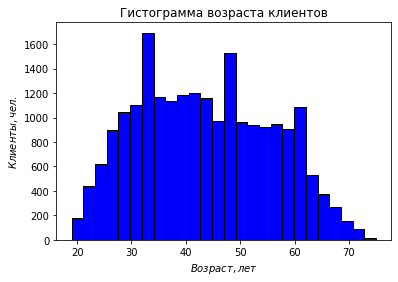

In [62]:
plt.hist(df['dob_years'], color = 'blue', edgecolor = 'black',
         bins = int(80/3))
plt.xlabel('$Возраст, лет$')
plt.ylabel('$Клиенты, чел.$')
plt.title('Гистограмма возраста клиентов')
plt.show()

## Шаг 4. Общий вывод

Датафрейм показывает информацию о 21525 клиентах, каждый описывается 12 признаками.
Имеются пропущенные значения по общему трудовому стажу ('days_employed') и ежемесячному доходу ('total_income') у 2174 клиентов, там же содержатся данные вещественного типа. Значения уровня образования и семейного статуса указаны и прописными буквами, и строчными. Обнаружены некоректные данные в виде отрицательных и нулевых значений.  
  
Для исправления пропущенных значений в столбце трудовом стаже мы использовали средний трудовой стаж, так как это значение при дальнейшей работе маловажен, о доходе - среднее значение по котегориям: пол, образование, тип дохода. Исправили некорректные давнные о количестве детей в семьях и возрасте клиентов, привели к нижнему регистру данные об образовании ('education') и семейном статусе ('family_status'), преобразоали вещественный тип данных в целый. Так же обнаружили 54 полных дубликата и удалили их. 
  
Для работы с колонкой о целях получения кредита использовали лемматизацию, выявили множество различных формулировок, описывающих одинаковые цели.
С помощью лемматизации нам удалось категоризировать данные на на 4 основные цели: "недвижимость", "автомобтль", "образование", "свадьба". Для удобства работы с датафреймом так же категоризировали данные об уровне дохода на 5 категорий: низкий(до 40000р.), средний(40000-100000р.), выше среднего(100000-200000р.), высокий(200000-900000р.), сверхдоход(от 900000р.) и определили кредитный статус клиента, где "надёжный заёмщик" - клиенты, не имеющие просрочек по кредитам, "отказать в кредите" - клиенты, имеющие просрочки по кредитам и низкий доход, "запросить подтверждение источника доходов" - клиенты, имеющие просрочки по кредитам и средний и выше среднего уровень дохода, "предварительно одобрен" - клиенты, имеющие просрочки по кредитам и высокий уровень дохода, "одобрен" - клиенты, имеющие просрочки по кредитам и сверхдоход.
  
Применив сводные таблицы, мы вычислили долю клиентов имеющих задолженность по кредиту в зависимости от налиция детей, семейного положения, уровня дохода и целей получения кредита и выяснили, что:
1. Наличие детей увеличивает вероятность задолженности по сравнению с отсутствием детей у клиента: 9,2% против 7,5% соответственно.
2. Семейное положение так же влияет на вероятность задолженности. Клиенты, находящиеся не в браке или в гражданском браке являются менее надёжными заёмщиками: 9,8% и 9,3% соответственно. Самые надежные заёмщики - клиенты из категории "вдовец/вдова" (6,6%).
3. Клиенты со сверх и высоким уровнем дохода с меньшей вероятностью попадают в список ненадёжных заёмщиков: 6,5% и 7% соответственно. Как ни странно, менее охотно своевременные выплаты производят клиенты с уровнем дохода выше среднего - 8,7%.
4. Низкая вероятность задолженности у клиентов, которые берут кредит для операций с недвижимостью (7,2%) и свадьбу (8%). Самая высокая вероятность задолженности у клиентов, взявших кредит на автомобиль (9,3%).